In [1]:
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas as pd
import numpy as np
jazz = nx.read_gml( 'jazz.gml', label = None)
karate = nx.read_gml('karate.gml', label = None)
jazz_edge_df = nx.to_pandas_edgelist(jazz)
jazz_edge_df

,source,target,value,id
0,1,8,2.0,0
1,1,24,2.0,1
2,1,35,2.0,2
3,1,42,2.0,3
4,1,46,2.0,4
...,...,...,...,...
2737,194,196,2.0,5341
2738,194,197,2.0,5342
2739,195,196,2.0,5387
2740,195,197,2.0,5388


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


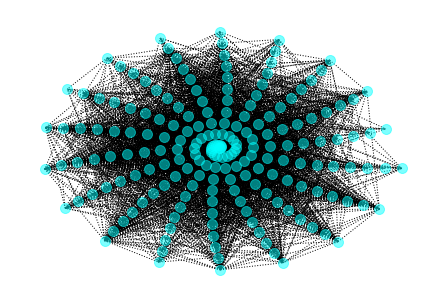

In [2]:
F = nx.from_pandas_edgelist(jazz_edge_df)
nx.draw(F, with_labels = False,
                node_size = 100,
                node_color= [0,1,1,0.5],
                style = 'dotted',
                 font_color = '32',
                 pos=nx.spiral_layout(jazz))
plt.show()

In [2]:


fig, ax = plt.subplots(figsize=(15, 8))

relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2'], 
                              'to':   ['B', 'C', 'D', 'C', 'C']})

# Create DF for node characteristics
carac = pd.DataFrame({'ID':['A', 'B', 'C', 'D', '1', '2'], 
 'type':['Letter','Letter', 'Letter', 'Letter', 'Number', 'Number']})

# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())
print(G.edges())
# Make types into categories
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

# Set node sizes
node_sizes = [4000 if entry != 'Letter' else 1000 for entry in carac.type]

# Draw graph
nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
        node_size=node_sizes)

NameError: name 'plt' is not defined

In [5]:
jazz_edge_index_id = jazz_edge_df.set_index('id')
T_jazz = nx.from_pandas_edgelist(jazz_edge_index_id, 'source', 'target', create_using=nx.Graph())


In [6]:
a = [x for x in T_jazz.degree()]
b = [x[1] for x in a]
c = [x for x in b]
c

[23,
 21,
 29,
 43,
 12,
 23,
 96,
 20,
 26,
 42,
 40,
 46,
 60,
 49,
 49,
 23,
 20,
 60,
 56,
 75,
 43,
 10,
 74,
 45,
 3,
 25,
 46,
 39,
 4,
 7,
 41,
 45,
 40,
 16,
 46,
 25,
 31,
 29,
 19,
 19,
 23,
 39,
 22,
 23,
 24,
 24,
 31,
 24,
 1,
 13,
 28,
 31,
 19,
 42,
 37,
 31,
 17,
 16,
 20,
 40,
 33,
 52,
 18,
 16,
 17,
 40,
 100,
 31,
 17,
 54,
 20,
 12,
 25,
 56,
 45,
 36,
 2,
 3,
 4,
 57,
 27,
 23,
 26,
 42,
 25,
 32,
 33,
 29,
 53,
 62,
 30,
 9,
 59,
 24,
 27,
 26,
 41,
 28,
 13,
 44,
 55,
 31,
 29,
 23,
 35,
 23,
 27,
 23,
 59,
 31,
 53,
 48,
 20,
 39,
 15,
 27,
 55,
 28,
 46,
 17,
 43,
 41,
 39,
 31,
 52,
 20,
 13,
 41,
 19,
 19,
 20,
 13,
 51,
 16,
 18,
 19,
 46,
 21,
 37,
 20,
 6,
 5,
 5,
 13,
 8,
 9,
 8,
 24,
 48,
 38,
 2,
 30,
 27,
 36,
 39,
 22,
 11,
 19,
 29,
 25,
 14,
 1,
 4,
 39,
 40,
 34,
 34,
 37,
 32,
 31,
 32,
 33,
 34,
 33,
 9,
 13,
 14,
 14,
 18,
 5,
 6,
 5,
 6,
 6,
 7,
 7,
 12,
 8,
 17,
 3,
 6,
 10,
 14,
 18,
 1,
 2,
 1,
 1]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


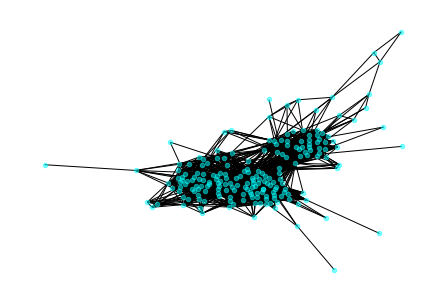

In [8]:
nx.draw(T_jazz,
pos=nx.spring_layout(T_jazz, iterations=150),
node_color = [0,1,1,0.5],
node_size =20 )

In [10]:
T_jazz.node_attr_dict_factory()
T_jazz.nodes()

NodeView((1, 8, 24, 35, 42, 46, 60, 74, 78, 81, 95, 98, 99, 100, 101, 103, 104, 108, 131, 132, 154, 159, 168, 171, 2, 14, 54, 150, 3, 115, 153, 167, 172, 4, 5, 13, 26, 77, 85, 102, 138, 147, 156, 169, 173, 176, 189, 19, 21, 27, 28, 29, 51, 53, 57, 73, 75, 76, 79, 86, 90, 96, 97, 124, 126, 128, 136, 140, 144, 149, 155, 163, 191, 194, 196, 197, 6, 152, 157, 7, 10, 11, 36, 49, 55, 56, 61, 67, 69, 70, 71, 72, 83, 87, 93, 94, 111, 112, 113, 114, 122, 125, 127, 129, 130, 141, 146, 151, 158, 161, 164, 170, 177, 178, 185, 190, 192, 193, 195, 89, 110, 118, 121, 142, 174, 9, 23, 32, 38, 80, 116, 117, 135, 137, 139, 162, 179, 12, 18, 31, 25, 92, 148, 186, 15, 16, 48, 91, 105, 107, 17, 62, 50, 88, 183, 184, 20, 22, 43, 182, 198, 30, 34, 106, 123, 33, 40, 44, 58, 63, 64, 65, 66, 109, 119, 134, 68, 166, 187, 37, 133, 180, 39, 181, 41, 45, 59, 82, 143, 47, 52, 188, 84, 175, 120, 145, 160, 165))